In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
#import seaborn as sb
import numpy as np
from ISLP import load_data

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
Boston = load_data("Boston")

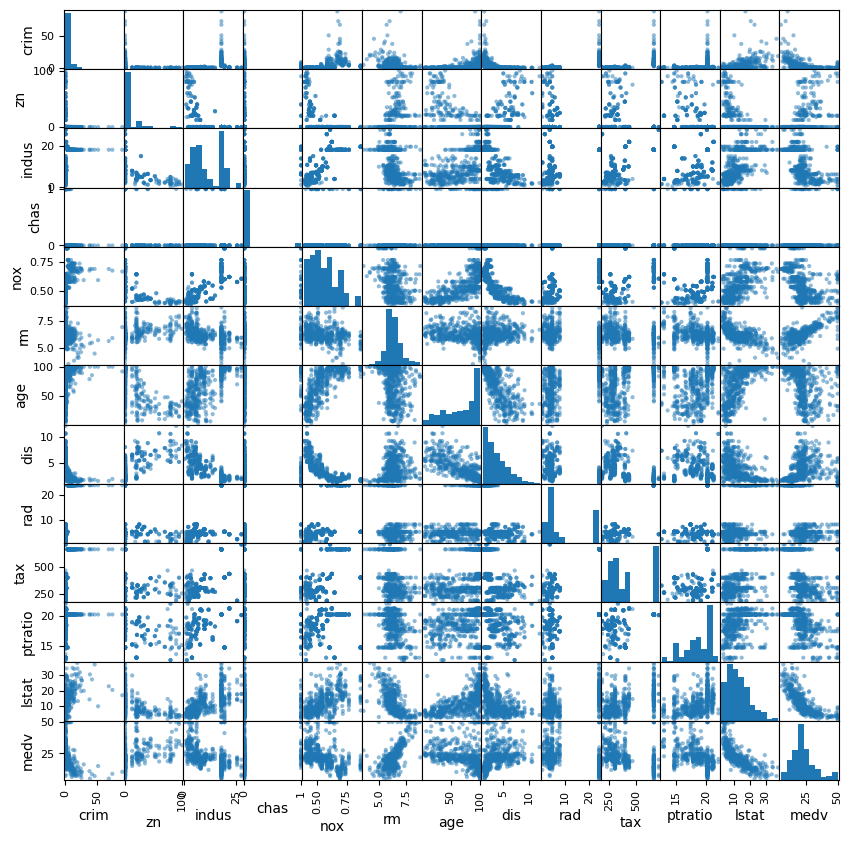

In [37]:
pd.plotting.scatter_matrix(Boston, figsize=(10, 10));

In [38]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [39]:
Crime_Median = Boston['crim'].median();Crime_Median ##Medijan varijable 'crim'

0.25651

In [40]:
Boston['Crime_rate'] = 'High' #Izrada novog stupca 'Crime_rate' s vrijednostima High.

In [41]:
Boston.loc[Boston['crim'] < Crime_Median, 'Crime_rate'] = 'Low' #

Text(0.5, 0, 'Broj retka')

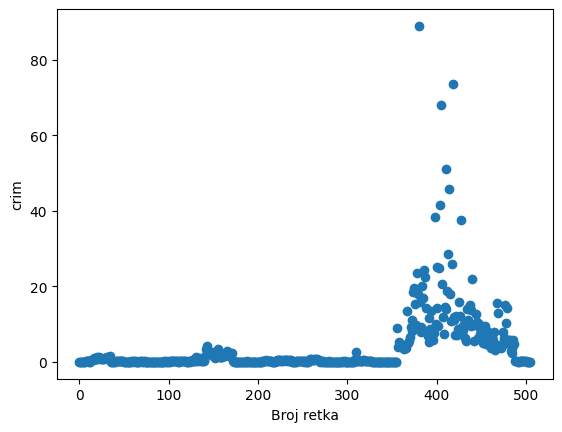

In [42]:
#Scatter plot varijable 'crim'
x = Boston.index
y = Boston['crim']
plt.scatter(x,y)
plt.ylabel('crim')
plt.xlabel('Broj retka')

Velika nehomogenost desno na grafu, zato je odlučeno trenirati modele po raznolikom području.

In [43]:
# Sortiranje DataFrame-a po indeksu
#sorted_df = Boston.sort_index()

# Definiranje raspona indeksa koje želite izdvojiti
#indeksni_rasponi = [(0, 75), (100, 175), (200, 275), (300, 375), (400, 475)]

# Inicijalizacija liste za spremanje podataka
#podaci_lista = []

# Iteracija kroz raspone indeksa
#for start, end in indeksni_rasponi:
    #podaci_lista.extend(sorted_df.iloc[start:end+1].values.tolist())

# Pretvaranje liste u DataFrame
#novi_df = pd.DataFrame(podaci_lista, columns=sorted_df.columns)

# Ispis rezultata ili daljnja obrada podataka
#novi_df

# Logistička

In [44]:
allvars = Boston.columns.drop(['Crime_rate','crim'])
design = MS(allvars)
X = design.fit_transform(Boston) 

# Definiranje raspona indeksa na kojima će se trenirati
raspon_indeksa = list(range(76)) + list(range(100, 176)) + list(range(200, 276)) + list(range(300, 376)) + list(range(400, 476))

Crime_train = Boston.iloc[raspon_indeksa]
Crime_test = Boston.loc[~Boston.index.isin(Crime_train.index)]

# Sortiranje X prema definiranom rasponu indeksa
X_train = X.iloc[raspon_indeksa]

# Identifikacija podataka koji nisu uključeni u sortirani_df
X_test = X.loc[~X.index.isin(Crime_train.index)]

# Sortiranje y prema definiranom rasponu indeksa
y_train = Crime_train.Crime_rate == 'High'
y_test = Crime_test.Crime_rate == 'High'

glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())

results = glm_train.fit()
probs = results.predict(exog=X_test)
summarize(results)

,coef,std err,z,P>|z|
intercept,-43.7718,7.788,-5.620,0.000
zn,-0.0710,0.038,-1.858,0.063
indus,-0.1181,0.058,-2.041,0.041
chas,0.7364,0.740,0.996,0.319
nox,56.6337,10.304,5.496,0.000
rm,-0.7845,0.843,-0.930,0.352
age,0.0132,0.013,0.978,0.328
dis,0.5552,0.228,2.438,0.015
rad,0.4675,0.189,2.470,0.014
tax,-0.0013,0.004,-0.344,0.730


Ima visokih $p$ vrijednosti, ali neće se micati iz analize.

There are high $p$-values, but they will not be removed from the analysis.

In [45]:
L_train, L_test = Crime_train.Crime_rate,  Crime_test.Crime_rate

In [46]:
labels = np.array(['High']*len(Crime_test))
labels[probs<0.5] = 'Low'  #Zbog nekog razloga u '' mogu ici max tri slova
confusion_table(labels, L_test)

Truth,High,Low
Predicted,,
High,39,13
Low,0,74


In [47]:
np.mean(labels == L_test), np.mean(labels != L_test) #Točnost i greška

(0.8968253968253969, 0.10317460317460317)

# LDA

In [48]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [49]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,High,Low
Predicted,,
High,39,21
Low,0,66


In [50]:
np.mean(lda_pred == L_test), np.mean(lda_pred != L_test) #Točnost i greška

(0.8333333333333334, 0.16666666666666666)

# QDA

In [51]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [52]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,High,Low
Predicted,,
High,37,15
Low,2,72


In [53]:
np.mean(qda_pred == L_test), np.mean(qda_pred != L_test) #Točnost i greška

(0.8650793650793651, 0.1349206349206349)

# Naive Bayes

In [54]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [55]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,High,Low
Predicted,,
High,38,16
Low,1,71


In [56]:
np.mean(nb_labels == L_test), np.mean(nb_labels != L_test) #Točnost i greška

(0.8650793650793651, 0.1349206349206349)

In [57]:
d = {'Logistička': ['87%'], 'LDA': ['88%'], 'QDA': ['28%'],'Naive Bayes': ['85%']}
df1 = pd.DataFrame(data=d, index=['Točnost testa'])

# Kratki opis:

# Brief description:

Rezultati algoritama na testnim podacima kada se treniralo na prvih 350 podataka, a testiralo na zadnjih 156 podataka (izbrisane su linije koda koje su to računale).

Results of the algorithms on the test data when trained on the first 350 entries and tested on the last 156 entries (the lines of code that performed these calculations have been removed).

In [58]:
df1

,Logistička,LDA,QDA,Naive Bayes
Točnost testa,87%,88%,28%,85%


Gornja tablica pokazuje rezultate algoritama na testnim podacima kada se treniralo na prvih 350 podataka, a testiralo na zadnjih 156 podataka.

The table above shows the results of the algorithms on the test data when trained on the first 350 entries and tested on the last 156 entries.

QDA jedini ima nisku točnost što naslućuje visoku jednakost kovarijance između klasa. Visoka točnost Logističkog i LDA modela sugerira da postoji linearna separabilnost u podacima. Velika točnost modela Naive Bayes bi moglo ukazati na to da postoji malo zavisnosti u podacima, ali ako se pogleda matrica korelacije vidljiva je miješana razina korelacije u podacima, što zapravo samo dodatno pokazuje na dobro funkcioniranje pretpostavke o nezavisnosti značajki. Uspjeh LDA također može značiti da podaci prate normalnu distribuciju, to se dodatno može istražiti pomoću histograma.

QDA is the only model with low accuracy, which suggests a high similarity in covariance between the classes. The high accuracy of the Logistic and LDA models suggests that there is linear separability in the data. The strong performance of the Naive Bayes model could indicate that there is little dependence among the features, but if we look at the correlation matrix, a mixed level of correlation is visible in the data, which actually further supports the effectiveness of the independence assumption. The success of LDA may also suggest that the data follow a normal distribution, which can be further investigated using histograms.

#

#

Rezultati algoritama na testnim podacima kada se treniralo na rasponu indeksa [(0, 75), (100, 175), (200, 275), (300, 375), (400,475)], a testiralo na ostalim podacima (njih 126):

Results of the algorithms on the test data when trained on the index ranges [(0, 75), (100, 175), (200, 275), (300, 375), (400,475)], and tested on the remaining data (126 entries):

In [59]:
d = {'Logistička': ['90%'], 'LDA': ['83%'], 'QDA': ['87%'],'Naive Bayes': ['87%']}
df2 = pd.DataFrame(data=d, index=['Točnost testa'])

In [60]:
df2

,Logistička,LDA,QDA,Naive Bayes
Točnost testa,90%,83%,87%,87%


Na svim algoritmima, osim na LDA, je vidljiva veća točnost, gdje je na QDA vidljivo ogromno poboljšanje kada se treniralo na raznolikom rasponu podataka. Zanimljivo je primijetiti da QDA i Naive Bayes imaju skoro identične rezultate.

Zanimljivo je vidjeti da algoritmi većinom krivo sortiraju 'LOW' Crime_rate predgrađa.

Promatranjem ovih rezultata su neki od prijašnjih zaključaka malo upitni, ono u što smo sigurni je da u ovom slučaju s većom raznolikošću podataka imamo točnije algoritme.

On all algorithms except LDA, greater accuracy is observed, with QDA showing a huge improvement when trained on a diverse range of data. It's interesting to note that QDA and Naive Bayes produce almost identical results.

It is also interesting to see that the algorithms mostly misclassify 'LOW' Crime_rate suburbs.

By observing these results, some of the previous conclusions become somewhat questionable; however, what we can be confident about is that, in this case, greater data diversity leads to more accurate algorithms.